In [3]:
from casacore.tables import table

MSfile = '/users/kyle/CASA/M83_KAT7/GMM/GMM.image'
gmm = table(MSfile,readonly=False)

MSfile = '/users/kyle/CASA/M83_KAT7/GMM/BDSF.gaus_model'
gmm_gaus = table(MSfile,readonly=False)

MSfile = '/users/kyle/CASA/M83_KAT7/GMM/BDSF.island_mask'
gmm_island = table(MSfile,readonly=False)

MSfile = '/users/kyle/CASA/M83_KAT7/Original/M83.image'
original = table(MSfile,readonly=False)

MSfile = '/users/kyle/CASA/M83_KAT7/Original/BDSF.gaus_model'
original_gaus = table(MSfile,readonly=False)

MSfile = '/users/kyle/CASA/M83_KAT7/Original/BDSF.island_mask'
original_island = table(MSfile,readonly=False)

MSfile = '/users/kyle/CASA/M83_KAT7/Original_Flag/M83.image'
flag = table(MSfile,readonly=False)

MSfile = '/users/kyle/CASA/M83_KAT7/Original_Flag/BDSF.gaus_model'
flag_gaus = table(MSfile,readonly=False)

MSfile = '/users/kyle/CASA/M83_KAT7/Original_Flag/BDSF.island_mask'
flag_island = table(MSfile,readonly=False)

MSfile = '/users/kyle/CASA/M83_KAT7/GMM_Complex/M83.image'
comp = table(MSfile,readonly=False)

MSfile = '/users/kyle/CASA/M83_KAT7/GMM_Complex/BDSF.gaus_model'
comp_gaus = table(MSfile,readonly=False)

MSfile = '/users/kyle/CASA/M83_KAT7/GMM_Complex/BDSF.island_mask'
comp_island = table(MSfile,readonly=False)

Successful read/write open of default-locked table /users/kyle/CASA/M83_KAT7/GMM/GMM.image: 1 columns, 1 rows
Successful read/write open of default-locked table /users/kyle/CASA/M83_KAT7/GMM/BDSF.gaus_model: 1 columns, 1 rows
Successful read/write open of default-locked table /users/kyle/CASA/M83_KAT7/GMM/BDSF.island_mask: 1 columns, 1 rows
Successful read/write open of default-locked table /users/kyle/CASA/M83_KAT7/Original/M83.image: 1 columns, 1 rows
Successful read/write open of default-locked table /users/kyle/CASA/M83_KAT7/Original/BDSF.gaus_model: 1 columns, 1 rows
Successful read/write open of default-locked table /users/kyle/CASA/M83_KAT7/Original/BDSF.island_mask: 1 columns, 1 rows
Successful read/write open of default-locked table /users/kyle/CASA/M83_KAT7/Original_Flag/M83.image: 1 columns, 1 rows
Successful read/write open of default-locked table /users/kyle/CASA/M83_KAT7/Original_Flag/BDSF.gaus_model: 1 columns, 1 rows
Successful read/write open of default-locked table /u

In [4]:
gmm_img = gmm.getcol("map")[0,0,0,:,:]
gmm_gaus_img = gmm_gaus.getcol("map")[0,0,0,:,:]
gmm_island_img = gmm_island.getcol("map")[0,0,0,:,:]
original_img = original.getcol("map")[0,0,0,:,:]
original_gaus_img = original_gaus.getcol("map")[0,0,0,:,:]
original_island_img = original_island.getcol("map")[0,0,0,:,:]
flag_img = flag.getcol("map")[0,0,0,:,:]
flag_gaus_img = flag_gaus.getcol("map")[0,0,0,:,:]
flag_island_img = flag_island.getcol("map")[0,0,0,:,:]
comp_img = comp.getcol("map")[0,0,0,:,:]
comp_gaus_img = comp_gaus.getcol("map")[0,0,0,:,:]
comp_island_img = comp_island.getcol("map")[0,0,0,:,:]


In [197]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(img4, img1))
rms

0.008876425944622415

In [1]:
vmax = 0.01

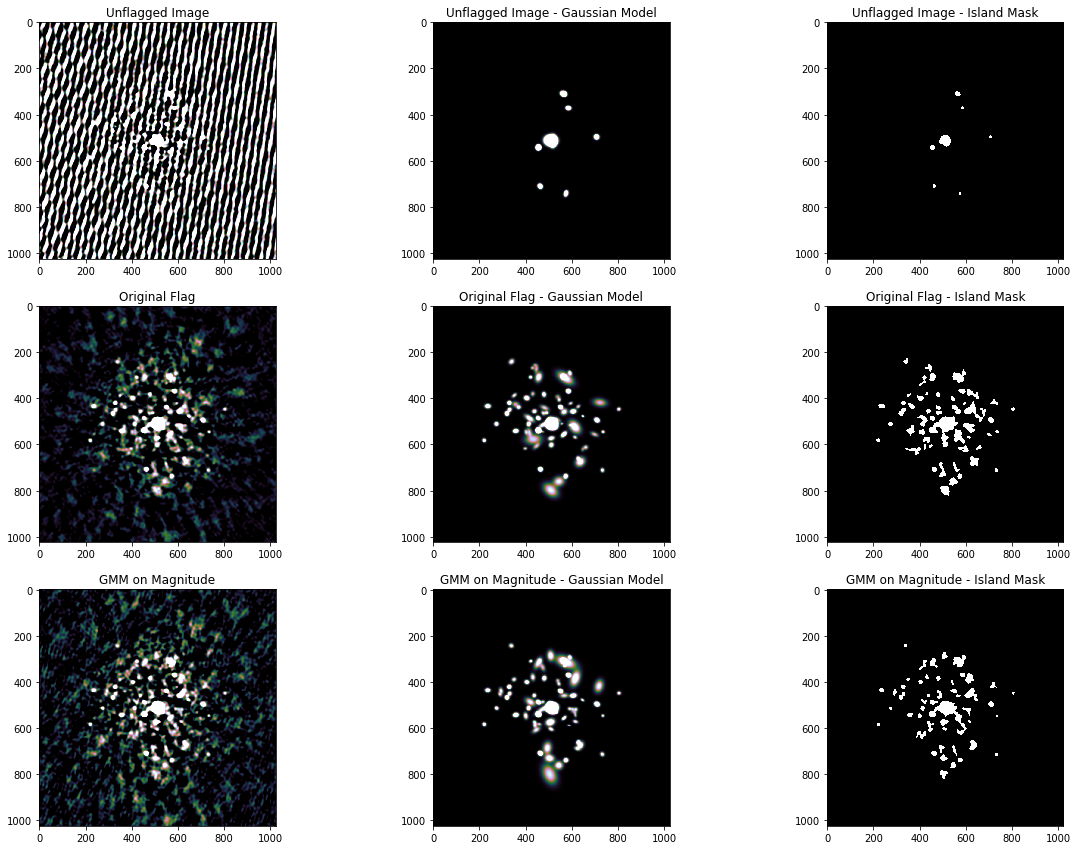

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,20))

palette = plt.cm.cubehelix

ax1 = fig.add_subplot(431)
im = ax1.imshow(original_img, 
                cmap=palette,
                vmax=vmax ,
                vmin=0
               )
ax1.set_title("Unflagged Image")

ax2 = fig.add_subplot(432)
im = ax2.imshow(original_gaus_img, 
                cmap=palette,
                vmax=vmax ,
                vmin=0
               )
ax2.set_title("Unflagged Image - Gaussian Model")

ax3 = fig.add_subplot(433)
im = ax3.imshow(original_island_img, 
                cmap=palette,
               )
ax3.set_title("Unflagged Image - Island Mask")

ax4 = fig.add_subplot(434)
im = ax4.imshow(flag_img, 
                cmap=palette,
                vmax=vmax ,
                vmin=0
               )
ax4.set_title("Original Flag")

ax5 = fig.add_subplot(435)
im = ax5.imshow(flag_gaus_img, 
                cmap=palette,
                vmax=vmax ,
                vmin=0
               )
ax5.set_title("Original Flag - Gaussian Model")

ax6 = fig.add_subplot(436)
im = ax6.imshow(flag_island_img, 
                cmap=palette,
               )
ax6.set_title("Original Flag - Island Mask")

ax7 = fig.add_subplot(437)
im = ax7.imshow(gmm_img, 
                cmap=palette,
                vmax=vmax ,
                vmin=0
               )
ax7.set_title("GMM on Magnitude")

ax8 = fig.add_subplot(438)
im = ax8.imshow(gmm_gaus_img, 
                cmap=palette,
                vmax=vmax ,
                vmin=0
               )
ax8.set_title("GMM on Magnitude - Gaussian Model")

ax9 = fig.add_subplot(439)
im = ax9.imshow(gmm_island_img, 
                cmap=palette,
               )
ax9.set_title("GMM on Magnitude - Island Mask")

fig.savefig('/users/kyle/images/all_images.png', bbox_inches='tight')
